In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import io
import requests
import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns 
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('datasets_85411_197066_lung_cancer_examples.csv')

In [4]:
df.head(5)

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [5]:
df.shape

(59, 7)

In [20]:
df.columns

Index(['Name', 'Surname', 'Age', 'Smokes', 'AreaQ', 'Alkhol', 'Result'], dtype='object')

In [22]:
df.dtypes

Name       object
Surname    object
Age         int64
Smokes      int64
AreaQ       int64
Alkhol      int64
Result      int64
dtype: object

In [24]:
df.describe()

,Age,Smokes,AreaQ,Alkhol,Result
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,42.627119,15.067797,5.203390,3.237288,0.474576
std,16.235230,7.984607,2.461984,2.380517,0.503640
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,10.000000,3.000000,1.000000,0.000000
50%,39.000000,15.000000,5.000000,3.000000,0.000000
75%,55.000000,20.000000,7.500000,5.000000,1.000000
max,77.000000,34.000000,10.000000,8.000000,1.000000


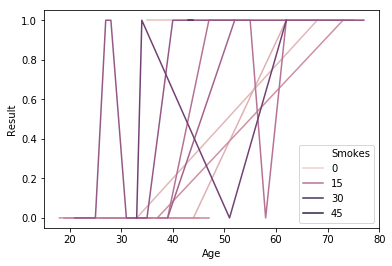

In [25]:
sns.lineplot(x='Age',y='Result',hue='Smokes',data=df)

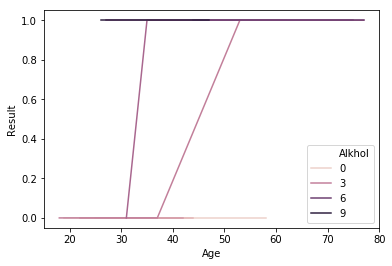

In [28]:
sns.lineplot(x='Age',y='Result',hue='Alkhol',data=df)

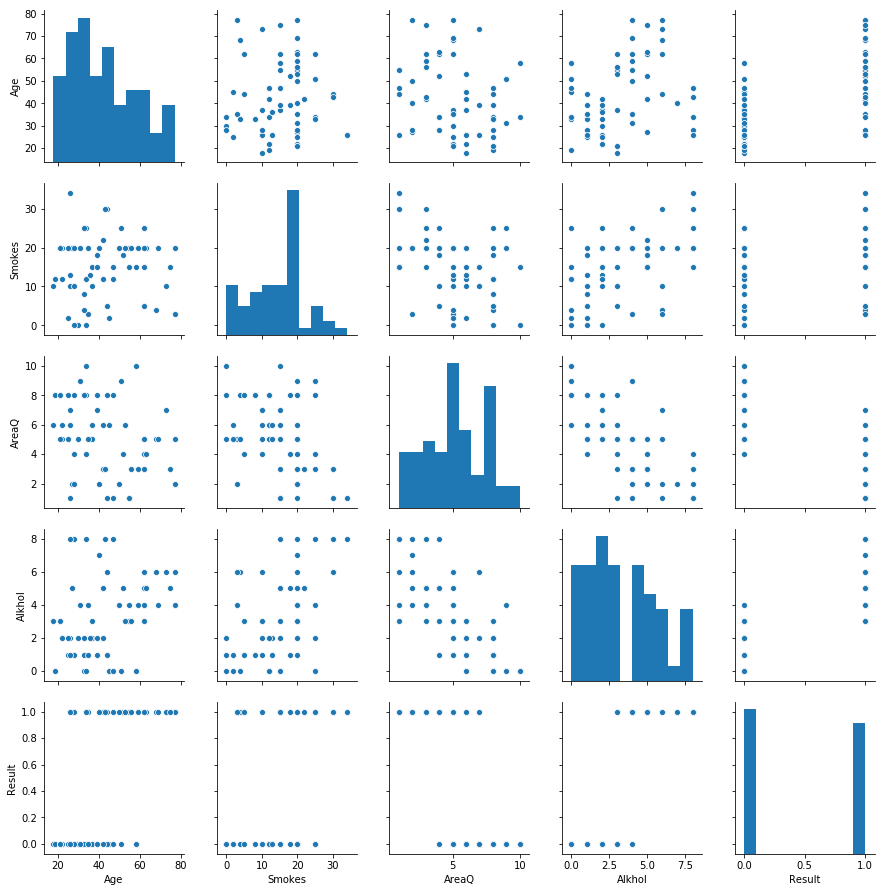

In [29]:
sns.pairplot(data=df)

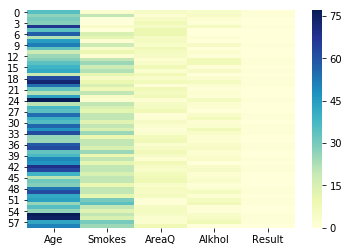

In [48]:
sns.heatmap(data=df[['Age', 'Smokes', 'AreaQ', 'Alkhol', 'Result']],cmap="YlGnBu")

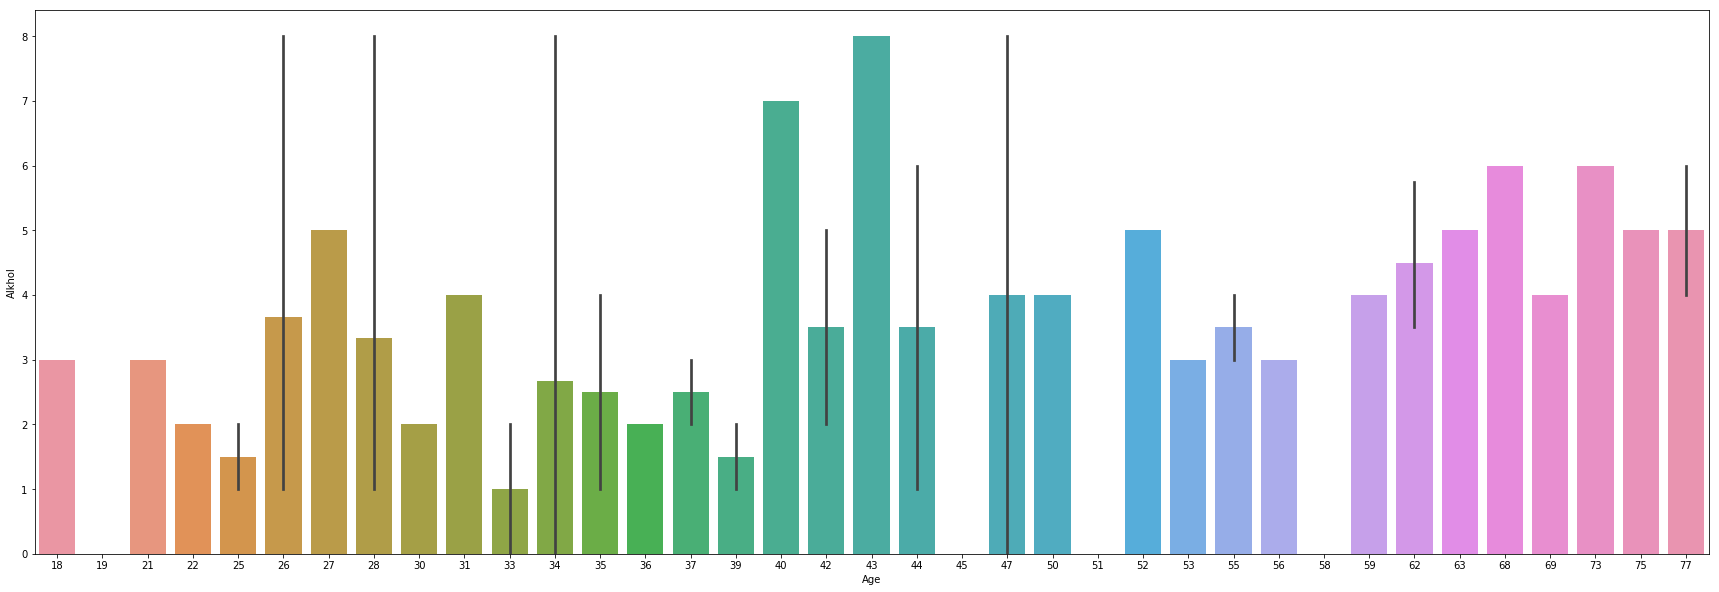

In [31]:
plt.figure(figsize=(30, 10))
g=sns.barplot(x='Age',y='Alkhol',data=df)

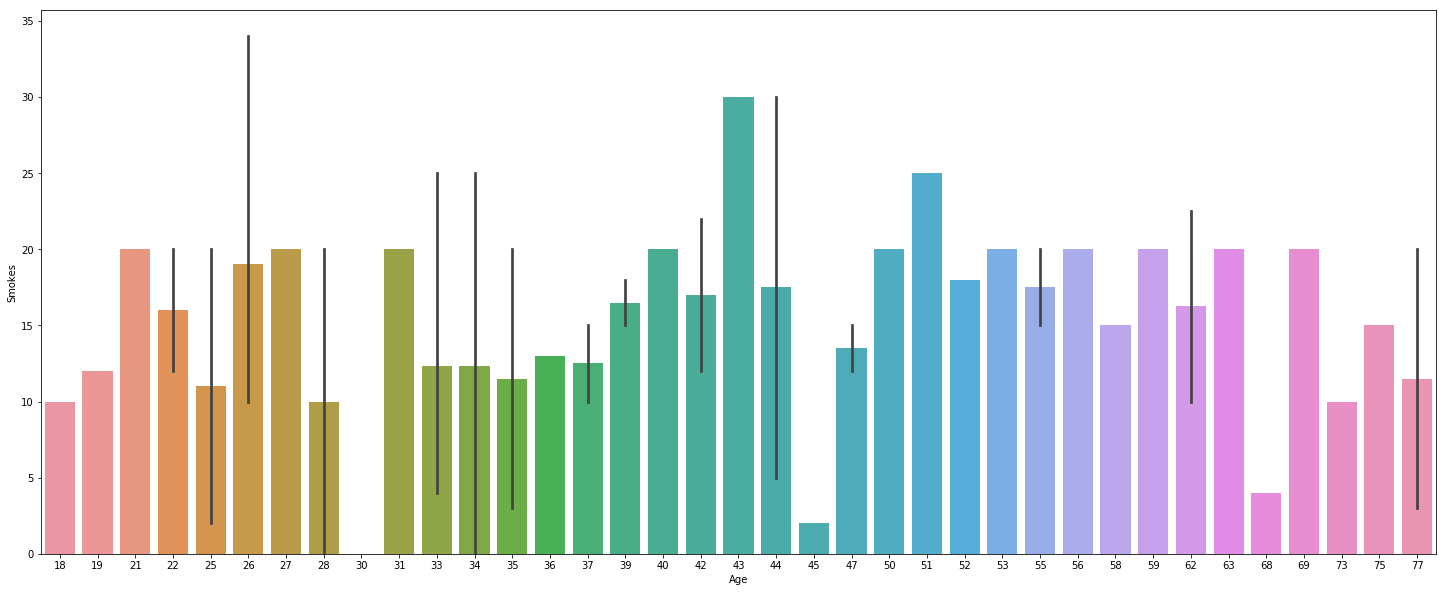

In [32]:
plt.figure(figsize=(25, 10))
g=sns.barplot(x='Age',y='Smokes',data=df)

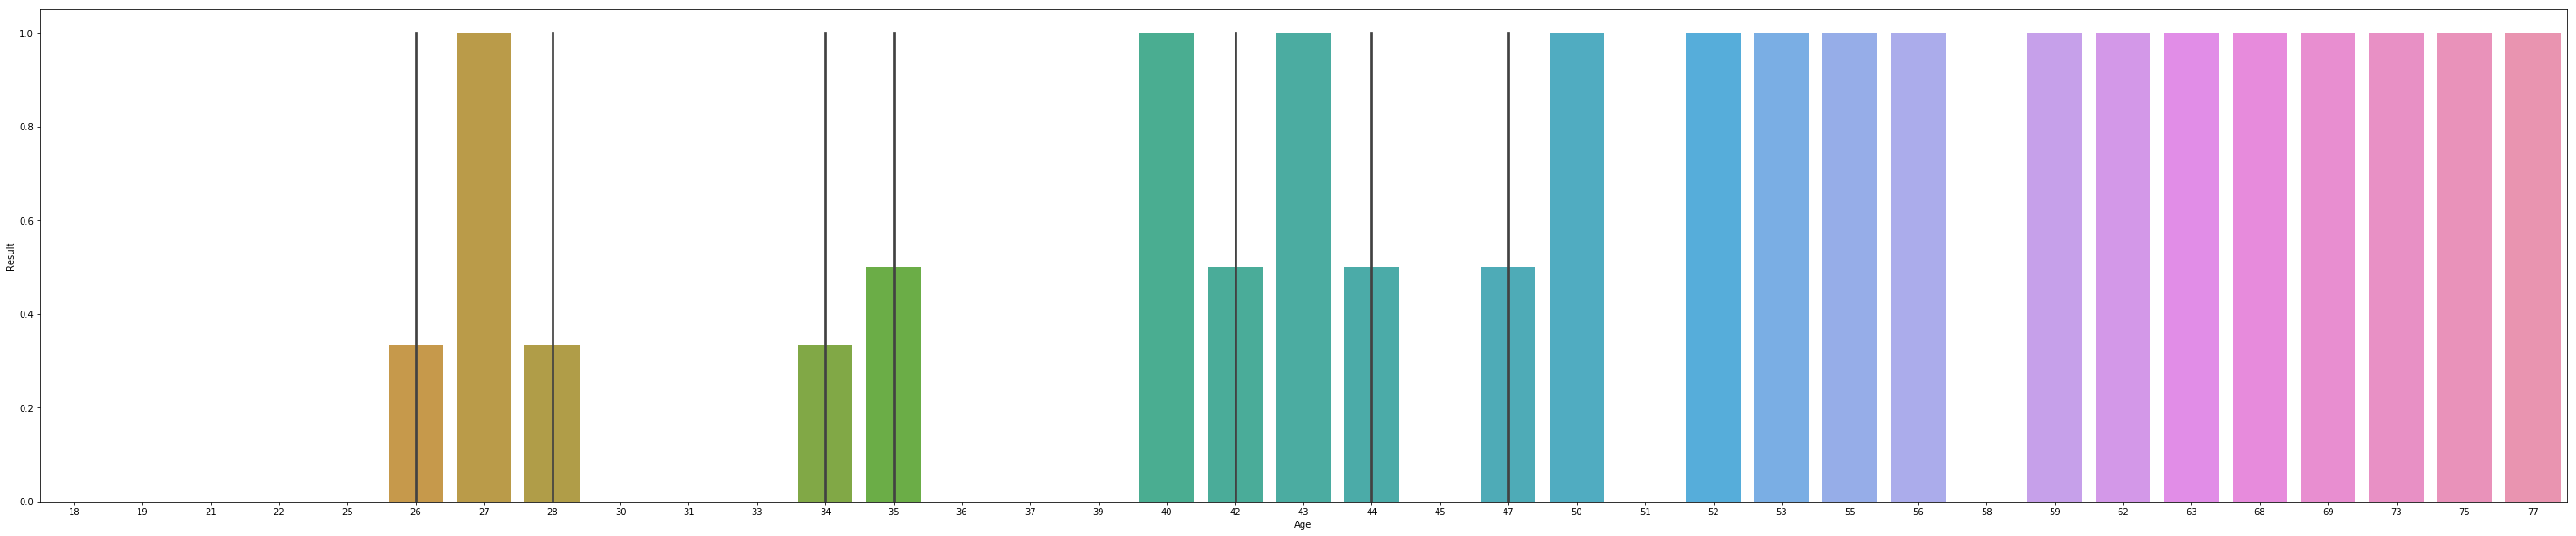

In [33]:
plt.figure(figsize=(50, 10))
g=sns.barplot(x='Age',y='Result',data=df)

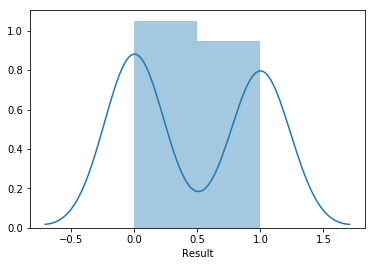

In [34]:
sns.distplot(df.Result)

In [35]:
df1 = df[df.Result==1]

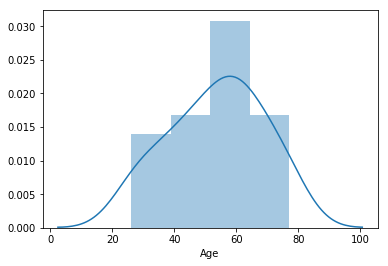

In [36]:
sns.distplot(df1.Age)

In [37]:
df2 = df[df.Result==0]

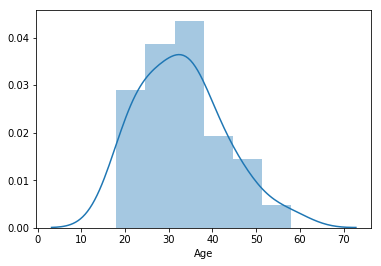

In [38]:
sns.distplot(df2.Age)

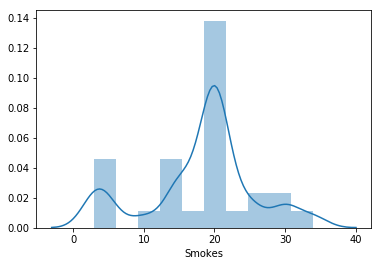

In [39]:
sns.distplot(df1.Smokes)

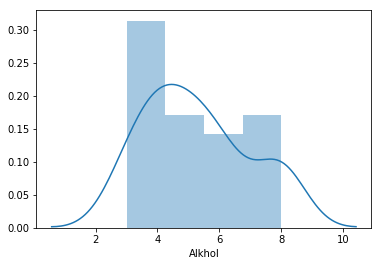

In [43]:
sns.distplot(df1.Alkhol)


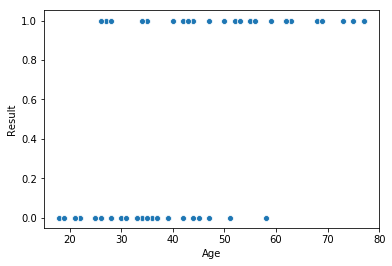

In [44]:
sns.scatterplot(x="Age", y="Result", data=df)


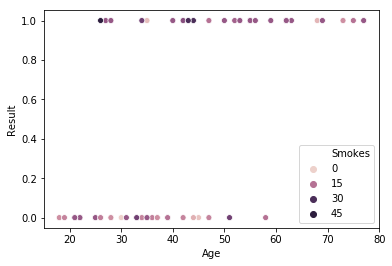

In [45]:
sns.scatterplot(x="Age", y="Result",
                      hue="Smokes",
                      data=df)

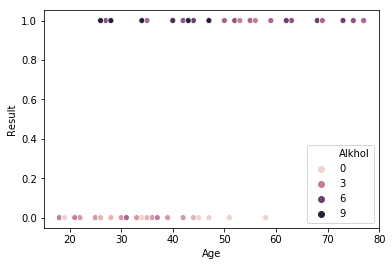

In [46]:
sns.scatterplot(x="Age", y="Result",
                      hue="Alkhol",
                      data=df)

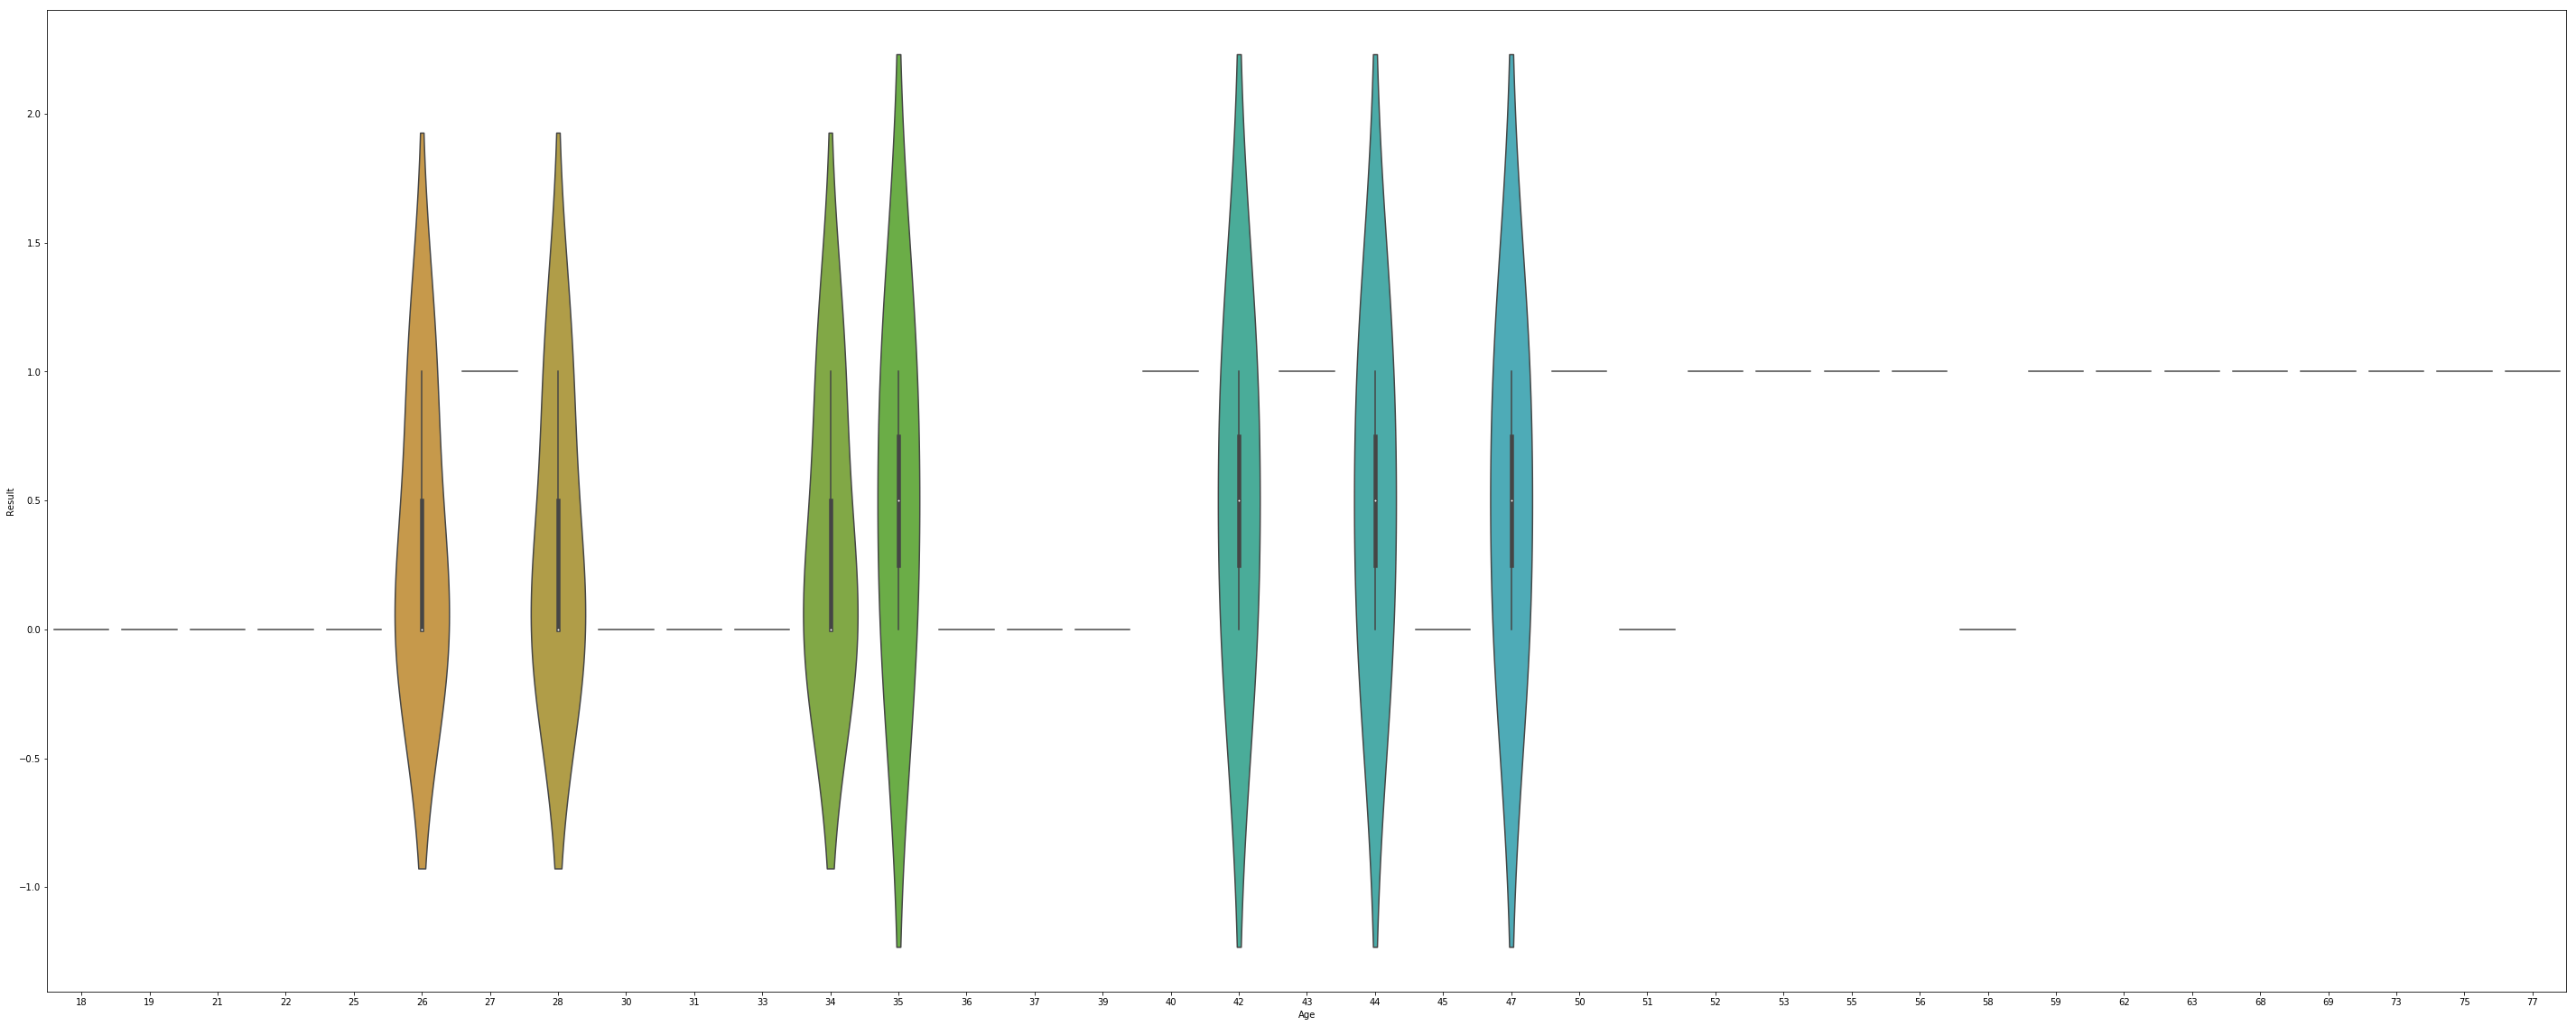

In [47]:
plt.figure(figsize=(50, 20))
sns.violinplot(x='Age',y='Result',data=df)

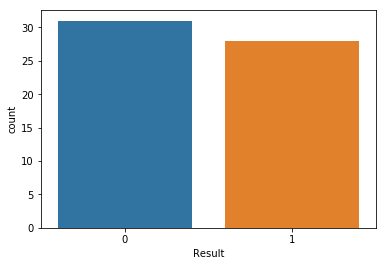

In [52]:
sns.countplot(data=df,x="Result")

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [6]:
X = df.drop(['Result', 'Name', 'Surname'], axis = 1, inplace = False)
Y=df.Result

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [10]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [11]:
y_pred=logreg.predict(X_test)

In [13]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[8, 0],
       [0, 4]], dtype=int64)

In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
